# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from dotenv import load_dotenv
from sqlalchemy import create_engine
import os
from funpymodeling.exploratory import freq_tbl

In [5]:
#load the .env file variables
load_dotenv()
connection_string = os.getenv('DATABASE_URL')
#print(connection_string)

In [6]:
df = pd.read_csv(connection_string, sep =',')

In [7]:
#Predicción de la diabetes:

# Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. 
# El objetivo es predecir en base a medidas diagnósticas si un paciente tiene diabetes.

# Diccionario de datos:

# Embarazos: Número de veces embarazadas
# Glucosa: concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia oral a la glucosa
# Presión arterial: presión arterial diastólica (mm Hg)
# Grosor de la piel: Grosor del pliegue cutáneo del tríceps (mm)
# Insulina: insulina sérica de 2 horas (mu U/ml)
# IMC: Índice de masa corporal (peso en kg/(altura en m)^2)
# DiabetesPedigreeFunction: función de pedigrí de diabetes
# Edad: Edad (años)
# Resultado: variable de clase (0 o 1), distribución de clase: (el valor de clase 1 se interpreta como "diabetes positivo")

# Variable objetivo 'Outcome'

In [ ]:
# Embarazos, #glucosa, #presion arterial, #grosor de la piel, insulina, #IMC, #DiabetesPedigreeFunction, #edad, Resultado

# Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome

In [8]:
# Encontrar patrones e información valiosa que lo ayudarán en su proceso de limpieza.

# No olvides escribir tus observaciones.

# Use app.py para crear su tubería de limpieza. Guarde sus datos limpios en la carpeta 'datos/procesados'.

In [9]:
df_raw = df.copy()

In [10]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df_raw.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199,76,43,0,42.9,1.394,22,1
690,8,107,80,0,0,24.6,0.856,34,0
30,5,109,75,26,0,36.0,0.546,60,0
414,0,138,60,35,167,34.6,0.534,21,1
360,5,189,64,33,325,31.2,0.583,29,1
644,3,103,72,30,152,27.6,0.730,27,0
202,0,108,68,20,0,27.3,0.787,32,0
174,2,75,64,24,55,29.7,0.370,33,0
177,0,129,110,46,130,67.1,0.319,26,1
213,0,140,65,26,130,42.6,0.431,24,1


In [12]:
df_raw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Dentro de las variables explicativas vemos con especial interes la distribucion del numero de embarazos en la muestra, el grosor o espesor
# de la piel, la presion arterial diastolica y la concentracion de glucosa mas que el valor de insulina, sin embargo limpiaremos el data set

In [13]:
len(df_raw[df_raw['Insulin']==0])

374

In [15]:
df_raw_0 = df_raw[df_raw['Outcome']==0]
df_raw_0['Insulin'].mean()

68.792

In [16]:
df_raw['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [17]:
df_raw_0 = df_raw[(df_raw['Outcome']==0) & (df_raw['Insulin']> 0)]
insuline_mean_0 = df_raw_0['Insulin'].mean()

In [18]:
df_raw_1 = df_raw[(df_raw['Outcome']!=0) & (df_raw['Insulin']> 0)]
insuline_mean_1= df_raw_0['Insulin'].mean()

In [19]:
def diabetes(insulin_value, outcome_value, insuline_mean_0,insuline_mean_1):
    if outcome_value == 0 and insulin_value==0:
        return insuline_mean_0
    elif outcome_value == 1 and insulin_value==0:
        return insuline_mean_1
    else:
        return insulin_value

In [20]:
df_raw['Insulin'] = df_raw.apply(lambda x: diabetes(x['Insulin'], x['Outcome'],insuline_mean_0,insuline_mean_1), axis=1)

In [21]:
df_raw[df_raw['Pregnancies']>11]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
28,13,145,82,19,110.000000,22.2,0.245,57,0
72,13,126,90,0,130.287879,43.4,0.583,42,1
86,13,106,72,54,130.287879,36.6,0.178,45,0
88,15,136,70,32,110.000000,37.1,0.153,43,1
159,17,163,72,41,114.000000,40.9,0.817,47,1
215,12,151,70,40,271.000000,41.8,0.742,38,1
254,12,92,62,7,258.000000,27.6,0.926,44,1
274,13,106,70,0,130.287879,34.2,0.251,52,0
298,14,100,78,25,184.000000,36.6,0.412,46,1
323,13,152,90,33,29.000000,26.8,0.731,43,1


In [22]:
df_raw.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,0.030408,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.409929,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.056911,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.167304,0.392573,0.183928,-0.113970,0.074752
Insulin,0.030408,0.409929,0.056911,0.167304,1.000000,0.166915,0.122015,0.104105,0.206065
BMI,0.017683,0.221071,0.281805,0.392573,0.166915,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.122015,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,0.104105,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.206065,0.292695,0.173844,0.238356,1.000000


In [ ]:
# no se observan riesgos de multicolinealidad entre las variables explicativas, las que muestran mayor correlacion son la edad con el numero
# de embarazos con 0.54, tambien entre el indice de masa corporal y la presion arterial aunque no muy significativa con 0.39

<AxesSubplot:>

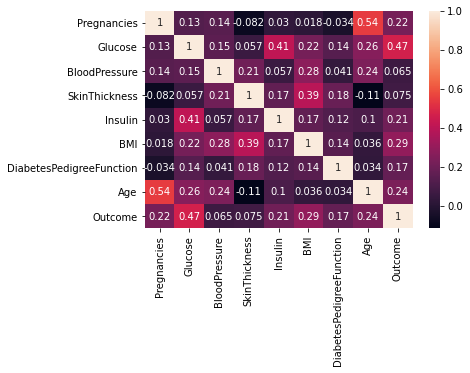

In [23]:
sns.heatmap(df_raw.corr(), annot=True)

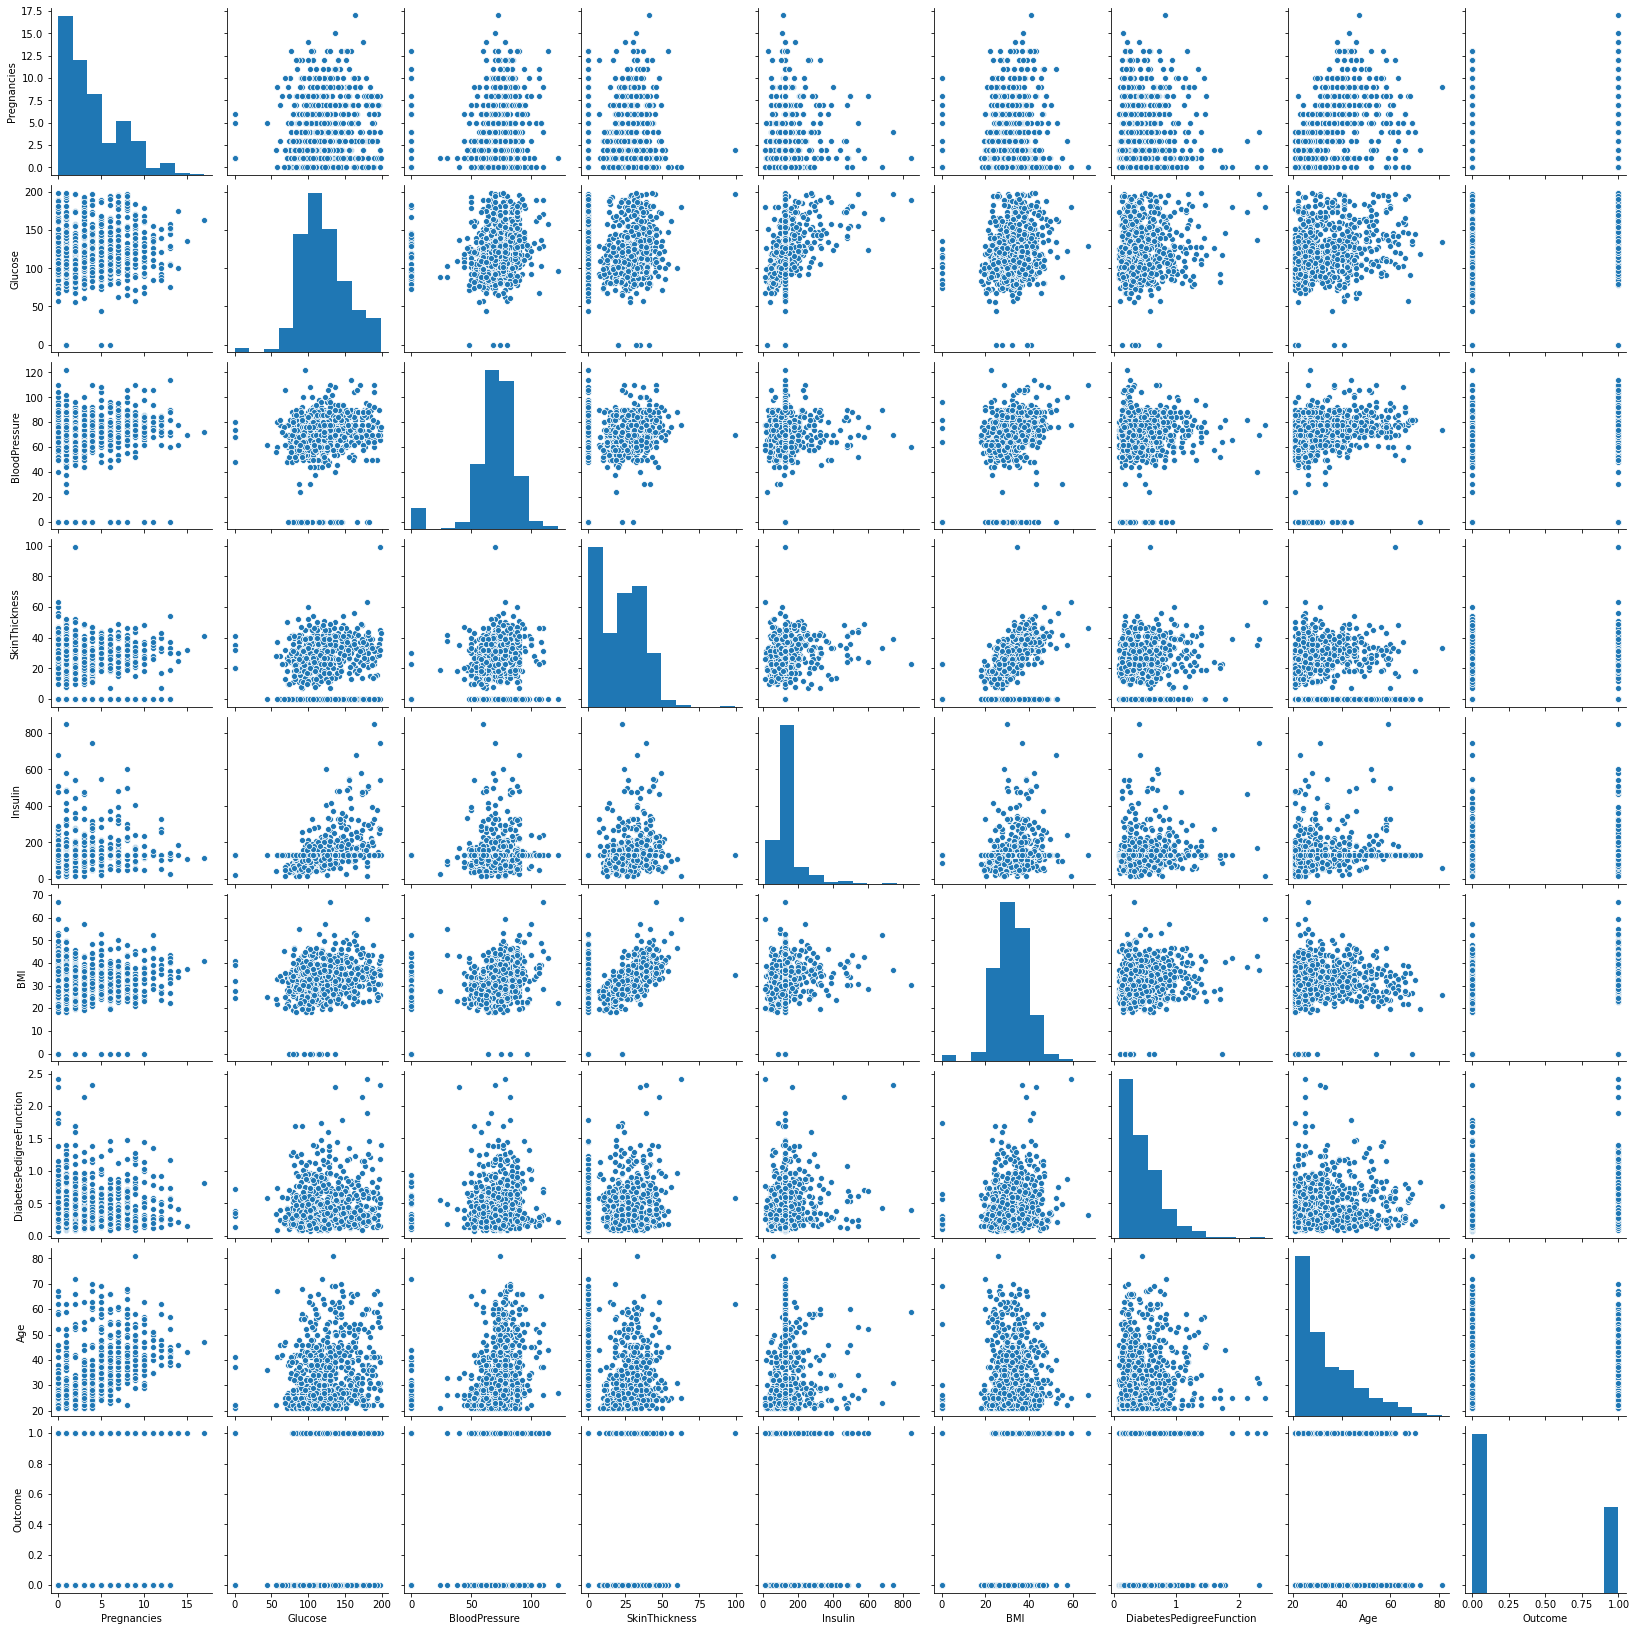

In [24]:
sns.pairplot(df_raw)

In [35]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


In [25]:
# Paso 3:

# Ahora que tiene un mejor conocimiento de los datos, en su cuaderno exploratorio cree un modelo de árbol de primera 
# decisión con sus datos limpios.

In [ ]:
# Embarazos, #glucosa, #presion arterial, #grosor de la piel, insulina, #IMC, #DiabetesPedigreeFunction, #edad, Resultado

# Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome

In [37]:
# Divido los datos en entrenamiento y validacion o test
# selecciono las variables que seran todas menos mi variable objetivo

df = df_raw.copy()

explicativas = df.drop(columns='Outcome')
objetivo = df.Outcome


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [39]:

X_train,X_test, y_train,y_test = train_test_split(explicativas,objetivo, random_state=43)

In [40]:
X_train.shape

(576, 8)

In [53]:
# Entreno al modelo de Decision Tree

model = DecisionTreeClassifier(max_depth=3)
model.fit(X=explicativas, y=objetivo)

DecisionTreeClassifier(max_depth=3)

In [54]:
# Visualizo el modelo
from sklearn.tree import plot_tree

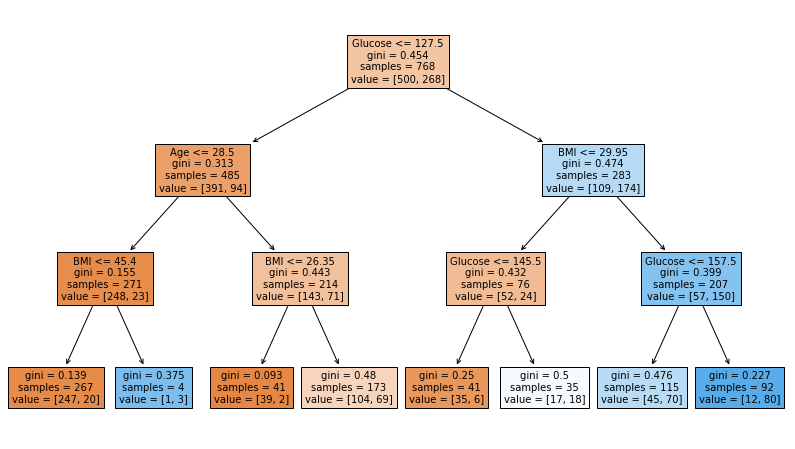

In [55]:
plt.figure(figsize=(14, 8))
plot_tree(decision_tree=model,feature_names=explicativas.columns, filled=True, fontsize=10);

In [ ]:
# El primero comentario que podemos hacer es que nuestro modelo encuentra a la Glucosa como una de las variables que mejor explica la presencia
# de diabetes en la muestra

In [56]:
# Calculemos la prediccion

a = explicativas.sample()
a

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
365,5,99,54,28,83.0,34.0,0.499,30


In [ ]:
# Toma la observacion numero 365, que tiene 30 años, tuvo 5 embarazos, tiene una presion arterial de 28, y el valor de la glucosa en 99
# Analizaremos la probabilidad que esta persona tenga diabetes, veamos como el modelo lo ha calculado, la primera condicion que toma el modelo es
# el valor de la Glucosa, tiene la Glucosa menor a 127.5, entonces es verdadero, despues la edad no es menor o igual a 28.5 entonces es falso, 
# vamos al siguiente nivel, el indice de masa corporal tampoco es menor a 26,35, falso nuevamente

# Conclusion de todas las 768 observaciones 173 personas estan en la misma condicion que la persona 365, entonces 69 de 173 tienen diabetes
# esto quiere decir que la probabilidad que la persona 365 tenga diabetes es 39%

In [57]:
69/173

0.3988439306358382

In [58]:
model.predict_proba(a)

array([[0.60115607, 0.39884393]])

In [ ]:
# nos arroja la misma probabilidad de que no tengan diabetes es de un 60,11% y de que si tengan un 39,88%

In [ ]:
# Vamos a calcular las predicciones para todas las personas, saber si tienen diabetes

In [62]:
y_pred = model.predict(explicativas)

In [74]:
import seaborn as sns
import numpy as np

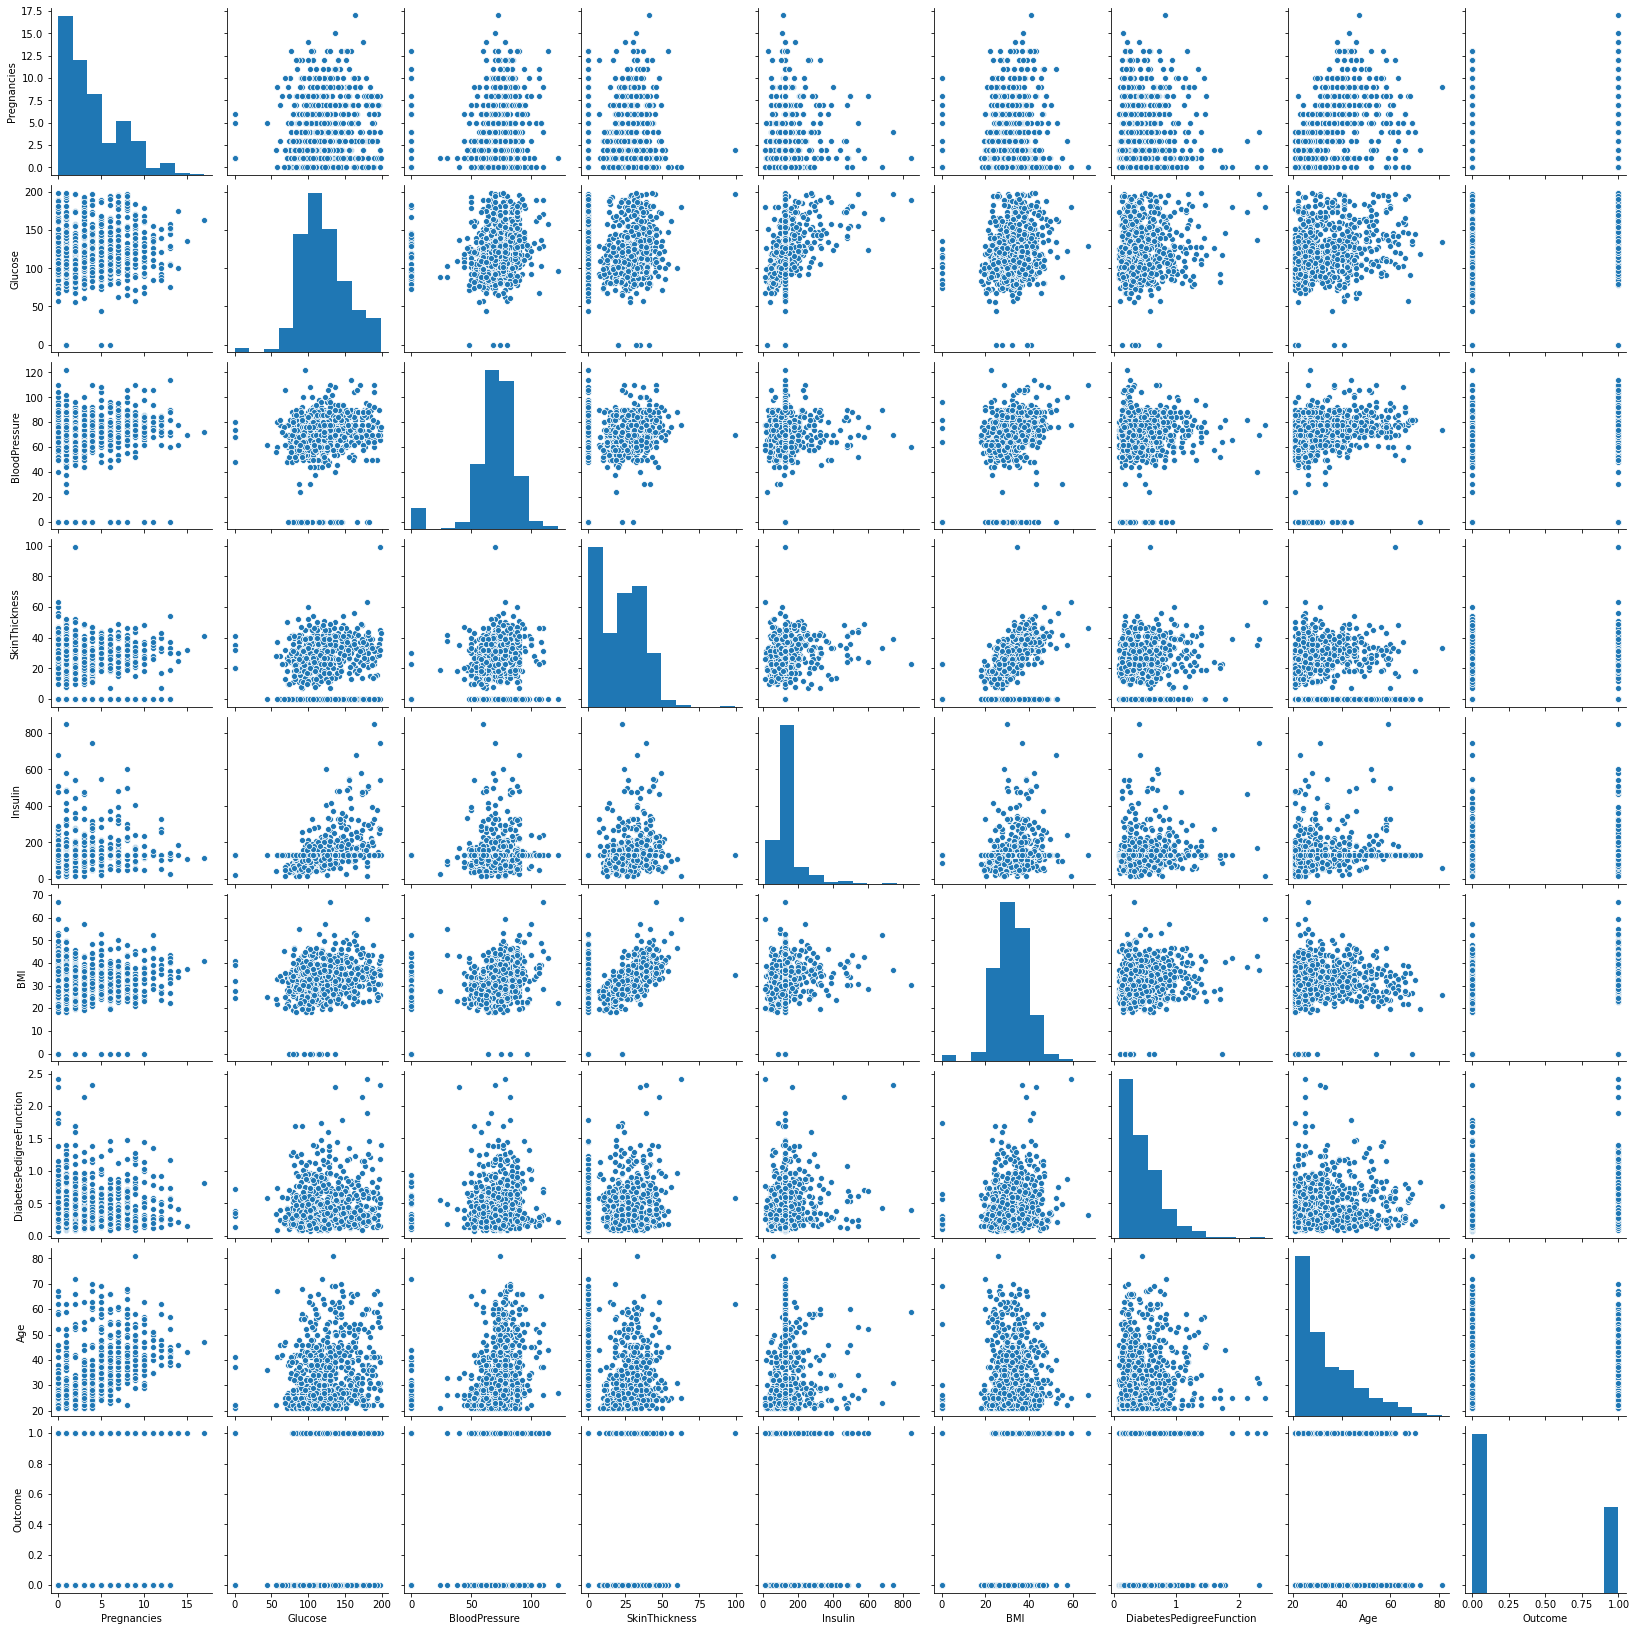

In [86]:
# Interpretando el modelo, y entendiendo porque tomo la Glucosa como la variable explicativa mas importante (ya que la puso arriba del todo)

sns.pairplot(df)

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

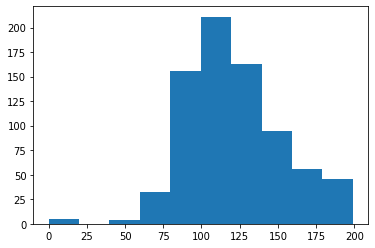

In [87]:
plt.hist(df.Glucose)

In [88]:
# Veamos que tan bueno es el modelo

df['pred'] = y_pred

In [89]:
df.sample(10)[['Outcome', 'pred']]

,Outcome,pred
40,0,1
452,0,0
672,0,0
414,1,1
424,1,1
70,1,0
177,1,1
64,1,0
404,1,1
609,0,0


In [91]:
# veamos el numero de aciertos del modelo, acerto 596 veces de 768

(df['Outcome'] == df['pred']).sum()

596

In [92]:
# Porcentaje de acierto

(df['Outcome'] == df['pred']).sum()/768

0.7760416666666666

In [94]:
# Porcentaje de acierto

(df['Outcome'] == df['pred']).mean()

0.7760416666666666

In [ ]:
# Podemos decir que nuestro modelo hace buenas predicciones en un 77% de las veces :)

In [ ]:
# Paso 4:

# Cambie su árbol de decisión para usar 'entropía' como criterio.


In [95]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)

clf.fit(X_train,y_train)
print('Accuracy:',clf.score(X_test,y_test))

Accuracy: 0.6875


In [96]:
clf_pred = clf.predict(X_test)

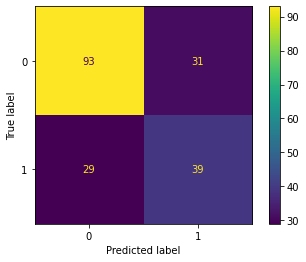

In [97]:
cm = confusion_matrix(y_test, clf_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=clf.classes_)
disp.plot()

plt.show()

In [98]:
print(classification_report(y_test, clf_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76       124
           1       0.56      0.57      0.57        68

    accuracy                           0.69       192
   macro avg       0.66      0.66      0.66       192
weighted avg       0.69      0.69      0.69       192



In [33]:
# esto quiere decir que los ceros tienen un 76% de precision, son los que no tienen diabetes
# en el caso de recall efectivamente son 1 un 68%

In [ ]:
# Paso 5:

# Hiperajuste su modelo usando GridSearch para encontrar los mejores hiperparámetros.

# Entrena tu modelo con los hiperparámetros óptimos.

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [104]:
#param_grid = [
    #{
        #"kernel": ["rbf"],
        #"gamma": [1e-3, 1e-4],
        #"C": [1,10,100,1000],
    #},

    #{
        #"kernel": ["linear"],
        #"C": [1,10,100,1000],
    #},
#]

In [107]:
#gridSearchCV = GridSearchCV(
    #estimator = SVC(),
    #param_grid=param_grid,
    #cv=5,
    #scoring="accuracy",
    #refit=True,
    #return_train_score=False,
#)

In [110]:
# Esta no funcion 
#gridSearchCV.fit(X_train,y_train)

In [111]:
# segundo intento


X_train,X_test, y_train,y_test = train_test_split(explicativas,objetivo, random_state=43)

In [ ]:
# Vuelva a utilizar app.py para crear su modelo final de aprendizaje automático.

# Guarde su modelo final en la carpeta 'modelos'.